In [1]:
# Import necessary libs
import glob
import json

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

from poem_topics import load_corpus
from poem_topics import print_topic_top_words
from poem_topics import lda_output_to_dataframe
from poem_topics import print_doc_topic_distribution

import matplotlib.pyplot as plt
%matplotlib inline

# Constants
# CORPUS_PATTERN = "../chinese-poetry/ci/ci.song.0.json"
CORPUS_PATTERN = "../chinese-poetry/ci/ci.song.*.json"

# LDA parameters
VOCABULARY_SIZE = 5000   # vocabulary size
NUM_TOPICS      = 32

# K-Means parameters
NUM_CLUSTERS    = 10

In [2]:
# Returns (transformed_corpus, feature_names)
# transformed_corpus is a N*V matrix, where N is #documents and V is the vocabulary size.
def vectorize(corpus):
    tf_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(),
                                    max_features=VOCABULARY_SIZE)
    transformed = tf_vectorizer.fit_transform(corpus)
    feature_names = tf_vectorizer.get_feature_names()
    return (transformed.todense(), feature_names)


raw_corpus = load_corpus(CORPUS_PATTERN)
print("Loaded %d documents." % len(raw_corpus))

corpus, vocabulary = vectorize(raw_corpus)
print("Vectorized documents: ")
print(corpus.shape)
print(vocabulary)

Loaded 21053 documents.
Vectorized documents: 
(21053, 5000)
['α', 'ι', 'н', 'え', 'め', 'ㄝ', '一', '丁', '七', '万', '丈', '三', '上', '下', '不', '与', '丐', '丑', '专', '且', '丕', '世', '丘', '丙', '业', '丛', '东', '丝', '丞', '两', '严', '丧', '个', '丫', '中', '丰', '串', '临', '丸', '丹', '为', '主', '丽', '举', '丿', '乃', '久', '么', '义', '之', '乌', '乍', '乎', '乏', '乐', '乔', '乖', '乘', '乙', '九', '乞', '也', '习', '乡', '书', '买', '乱', '乳', '乾', '了', '予', '争', '事', '二', '于', '亏', '云', '互', '五', '井', '亘', '亚', '些', '亟', '亡', '亢', '交', '亥', '亦', '产', '亨', '亩', '享', '京', '亭', '亮', '亲', '亳', '亵', '人', '亿', '什', '仁', '仃', '仄', '仅', '仆', '仇', '今', '介', '仍', '从', '仑', '仓', '仔', '仕', '他', '仗', '付', '仙', '仝', '仞', '代', '令', '以', '仪', '们', '仰', '仲', '件', '价', '任', '仿', '企', '伊', '伍', '伎', '伏', '伐', '休', '众', '优', '会', '伛', '伞', '伟', '传', '伤', '伥', '伦', '伧', '伪', '伫', '伯', '伴', '伶', '伸', '伺', '似', '伽', '佃', '但', '位', '低', '住', '佐', '佑', '体', '何', '佗', '余', '佚', '佛', '作', '佞', '你', '佣', '佥', '佩', '佯', '佳', '佶', '佼', '使', '侃', '侄', '侈', '例'

In [3]:
lda_model = LatentDirichletAllocation(
    n_components=NUM_TOPICS,
    doc_topic_prior=1.0/NUM_TOPICS,
    topic_word_prior=1.0/VOCABULARY_SIZE,
    learning_method='online',
    max_iter=15)
print("LDA parameters:")
print(lda_model.get_params())

# Train:
lda_model.fit(corpus)

# Print results:
print_topic_top_words(lda_model, vocabulary, 20)

# Higher the better
print("Log Likelihood: ", lda_model.score(corpus))

# Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(corpus))

LDA parameters:
{'batch_size': 128, 'doc_topic_prior': 0.03125, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 15, 'mean_change_tol': 0.001, 'n_components': 32, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': None, 'topic_word_prior': 0.0002, 'total_samples': 1000000.0, 'verbose': 0}
Topic 0:
我 之 吾 何 也 非 宁 者 知 有 无 矣 可 此 不 亦 如 子 老 而
Topic 1:
封 公 万 平 业 大 书 骑 天 英 文 武 事 国 勋 论 城 臣 兵 诏
Topic 2:
江 南 悠 舟 楼 西 流 楚 州 望 古 游 吴 里 秋 东 北 去 头 万
Topic 3:
人 不 花 一 是 时 有 来 风 好 更 月 似 清 为 得 未 年 谁 多
Topic 4:
寿 年 天 仙 金 日 玉 长 星 岁 朝 千 春 华 生 堂 今 气 明 瑞
Topic 5:
玉 香 风 月 花 清 雪 枝 寒 冰 宫 金 红 梅 匆 春 夜 云 琼 妆
Topic 6:
山 风 人 一 云 天 何 水 月 不 无 中 如 空 有 清 处 千 来 里
Topic 7:
麟 整 顿 曳 苒 呼 冠 霁 请 锡 简 巍 蔼 彤 隆 芒 扶 图 街 麒
Topic 8:
生 年 来 名 君 一 事 人 子 看 笑 有 长 书 公 家 诗 从 儿 须
Topic 9:
皇 腾 斟 九 荐 指 咏 觞 屈 正 仪 羹 尧 韶 启 缨 太 液 庚 值
Topic 10:
儿 尺 最 药 学 烂 你 头 酿 些 黑 咫 男 便 颊 就 奴 蛇 悟 这
Topic 11:
春 花 红 风 柳 绿 芳 香 燕 帘 日 小 雨 莺 翠 轻 飞 东 暖 新
Topic 12:
水 烟 凉 风 秋 雨 波 云 凄 纷 荷 

In [4]:
# Doc to topic distribution:

# Create Document - Topic Matrix
lda_output = lda_model.transform(corpus)
doc_topic_dist = lda_output_to_dataframe(lda_output)
print_doc_topic_distribution(doc_topic_dist, 15)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,Topic24,Topic25,Topic26,Topic27,Topic28,Topic29,Topic30,Topic31,dominant_topic
Doc0,0.00032,0.00032,0.00032,0.14665,0.09443,0.31053,0.08961,0.00032,0.05404,0.00032,0.00032,0.00032,0.00032,0.00032,0.02366,0.00032,0.00032,0.09548,0.05433,0.00032,0.01326,0.00032,0.00032,0.09945,0.00032,0.00032,0.00032,0.00032,0.01186,0.00032,0.00032,0.00032,5
Doc1,0.00028,0.00028,0.00028,0.00028,0.09944,0.00028,0.18001,0.00028,0.01968,0.00028,0.00028,0.21863,0.00028,0.00028,0.01131,0.00028,0.44058,0.00028,0.00028,0.00028,0.00028,0.00028,0.00028,0.00028,0.00028,0.00028,0.00028,0.00028,0.00028,0.00028,0.02343,0.00028,16
Doc2,0.00031,0.05679,0.09025,0.00031,0.00031,0.0904,0.00031,0.01031,0.61294,0.00031,0.00031,0.06509,0.00031,0.00031,0.01746,0.00031,0.00031,0.00031,0.00031,0.00031,0.01144,0.00031,0.03813,0.00031,0.00031,0.00031,0.00031,0.00031,0.00031,0.00031,0.00031,0.00031,8
Doc3,0.00068,0.00068,0.00068,0.0814,0.00068,0.00068,0.66359,0.00068,0.00068,0.00068,0.02958,0.00068,0.00068,0.00068,0.00068,0.00068,0.00068,0.17024,0.00068,0.00068,0.00068,0.00068,0.00068,0.00068,0.00068,0.00068,0.00068,0.00068,0.00068,0.00068,0.03684,0.00068,6
Doc4,0.00027,0.00027,0.14815,0.09693,0.12515,0.00027,0.16477,0.0991,0.00027,0.00027,0.00027,0.23795,0.08624,0.00027,0.01483,0.00027,0.02069,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,11
Doc5,0.00051,0.00051,0.03738,0.14869,0.00051,0.00051,0.00051,0.00051,0.00051,0.00051,0.00051,0.1064,0.00051,0.00051,0.00051,0.00051,0.00051,0.37404,0.00051,0.02955,0.00051,0.00051,0.00051,0.00051,0.00051,0.00051,0.00051,0.00051,0.00051,0.01882,0.00051,0.2723,17
Doc6,0.00027,0.05369,0.02181,0.22225,0.31659,0.25457,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.03816,0.00027,0.02493,0.00027,0.00027,0.00027,0.02112,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.04062,4
Doc7,0.01257,0.00027,0.5792,0.00027,0.00027,0.00027,0.00027,0.00027,0.18374,0.00947,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.00027,0.15236,0.00027,0.00027,0.00027,0.00027,0.00027,0.01072,0.00027,0.00027,0.00027,0.00027,0.03365,0.00027,0.01187,0.00027,2
Doc8,0.00033,0.06727,0.02014,0.10576,0.11972,0.17573,0.20051,0.00033,0.00033,0.00033,0.00033,0.00033,0.04668,0.00033,0.07908,0.00033,0.00033,0.00033,0.15098,0.00033,0.01561,0.00033,0.00033,0.01154,0.00033,0.00033,0.00033,0.00033,0.00033,0.00033,0.00033,0.00033,6
Doc9,0.00057,0.00057,0.00057,0.0744,0.00057,0.40632,0.00057,0.00057,0.27608,0.00057,0.00057,0.00057,0.00057,0.00057,0.00057,0.00057,0.00057,0.22728,0.00057,0.00057,0.00057,0.00057,0.00057,0.00057,0.00057,0.00057,0.00057,0.00057,0.00057,0.00057,0.00057,0.00057,5


In [5]:
# Topic to document distribution:
topic_doc_dist = doc_topic_dist['dominant_topic'].value_counts().reset_index(name="Num Documents")
topic_doc_dist.columns = ['Topic Num', 'Num Documents']
topic_doc_dist

,Topic Num,Num Documents
0,17,5248
1,6,5129
2,3,3324
3,11,1719
4,26,1698
5,4,1207
6,5,884
7,8,575
8,12,268
9,22,249


In [8]:
def print_document(index, raw_corpus, lda_output, doc_topic_dist):
    print(raw_corpus[index])
    print("Dominant topic: " + str(doc_topic_dist.iloc[index]["dominant_topic"]))
    print(lda_output[index, :])
    

# Construct the k-means clusters, then print 5 documents from each cluster.
clusters = KMeans(n_clusters=NUM_CLUSTERS, random_state=100).fit_predict(lda_output)
      
for k in range(NUM_CLUSTERS):
    displayed = 0
    print("Cluster #%d:" % k)
    for j in range(clusters.shape[0]):
        if clusters[j] == k:
            print("Sample document #%d" % displayed)
            print_document(j, raw_corpus, lda_output, doc_topic_dist)
            displayed += 1
        if displayed > 5:
            break

Cluster #0:
Sample document #0
迅 影 凋 年 嫩 晴 贳 暖 意 行 问 讯 春 色 不 知 春 在 谁 家 闯 香 幔 拢 玉 勒 一 枝 竹 外 似 欲 诉 经 年 相 忆 奈 情 多 难 剪 愁 来 寂 寞 水 寒 烟 碧 吟 正 好 悲 笳 唤 恨 酒 正 夕 阳 催 客 殷 勤 片 月 飞 来 更 随 暗 香 细 索 横 斜 瘦 影 看 尽 未 开 时 消 息 为 春 来 还 怕 春 多 肠 断 夜 阑 霜 笛
Dominant topic: 17.0
[3.12500000e-04 3.12500000e-04 3.12500000e-04 3.12500000e-04
 3.12500000e-04 3.12500000e-04 3.12500000e-04 3.12500000e-04
 3.12500000e-04 3.12500000e-04 3.12500000e-04 8.89759348e-02
 3.12500000e-04 3.12500000e-04 3.12500000e-04 3.12500000e-04
 3.12500000e-04 5.16821229e-01 4.49754378e-02 3.12500000e-04
 3.04650864e-02 3.12500000e-04 1.06086658e-01 3.12500000e-04
 3.12500000e-04 3.12500000e-04 2.04550654e-01 3.12500000e-04
 3.12500000e-04 3.12500000e-04 3.12500000e-04 3.12500000e-04]
Sample document #1
寒 云 飞 万 里 一 番 秋 一 番 搅 离 怀 向 隋 堤 跃 马 前 时 柳 色 今 度 蒿 莱 锦 缆 残 香 在 否 枉 被 白 鸥 猜 千 古 扬 州 梦 一 觉 庭 槐 歌 吹 竹 西 难 问 拚 菊 边 醉 著 吟 寄 天 涯 任 红 楼 踪 迹 茅 屋 染 苍 苔 几 伤 心 桥 东 片 月 趁 夜 潮 流 恨 入 秦 淮 潮 回 处 引 西 风 恨 又 渡 江 来
Dominant topic: 17.0
[3.18877551e-04 3.18877551e

Component's weights: 
 [[ 0.03  0.03  0.08  0.34  0.1   0.15  0.48  0.01  0.1   0.01  0.02  0.26
   0.1   0.01  0.04  0.    0.06  0.66  0.03  0.03  0.02  0.01  0.09  0.01
   0.03  0.01  0.26  0.    0.01  0.03  0.03  0.05]
 [ 0.02  0.03  0.04  0.14  0.09  0.05  0.75  0.    0.08  0.01  0.01 -0.09
   0.03  0.01  0.04  0.    0.05 -0.62  0.01  0.02 -0.    0.   -0.01  0.
   0.    0.01 -0.03  0.    0.    0.01  0.02 -0.01]]
Perc of Variance Explained: 
 [0.06 0.27]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

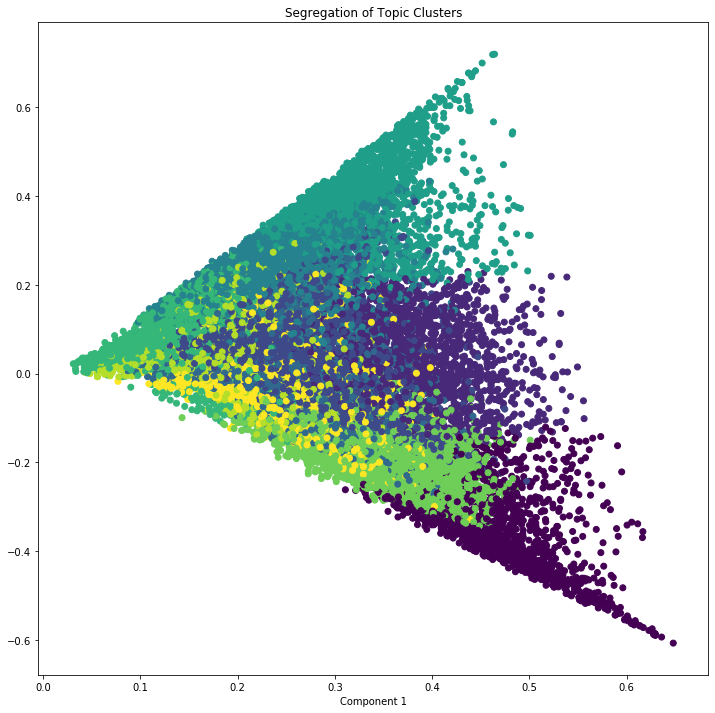

In [7]:
# Draw document clusters in 2-d

# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

In [10]:
print(clusters)

[8 4 6 ... 6 2 3]


In [13]:
print(lda_output_svd)

[[ 0.22113315  0.05912509]
 [ 0.1833851   0.14774557]
 [ 0.10450739  0.05521197]
 ...
 [ 0.0486708   0.03000823]
 [ 0.28998571  0.25613349]
 [ 0.30061869 -0.12256122]]
